In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
! pip install xlrd

## Gas and Electricity Prices

In [26]:
fuel_prices = pd.read_excel('avg_retail_fuel_prices_cleaned.xlsx', index_col=0)
fuel_prices['Year'] = fuel_prices.index
fuel_cleaned = fuel_prices[fuel_prices['Year'] != '7/1//14'][['Gasoline', 'Year', 'Electricity**']].reset_index(drop=True)
fuel_cleaned['Year'] = pd.to_datetime(fuel_cleaned['Year'])
fuel_cleaned = fuel_cleaned[fuel_cleaned['Year'] > datetime.datetime(2010, 1, 1)]
fuel_cleaned = fuel_cleaned.rename(columns={"Electricity**": "Electricity"})
fuel_cleaned.head()

,Gasoline,Year,Electricity
29,2.65,2010-01-19,NaN
30,2.84,2010-04-02,NaN
31,2.71,2010-07-12,NaN
32,2.78,2010-10-04,NaN
33,3.08,2011-01-24,1.19


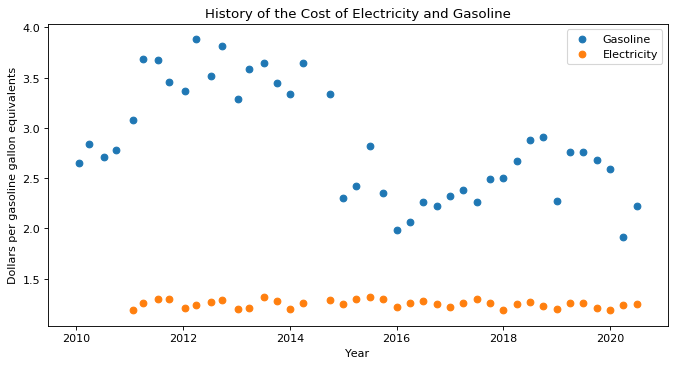

In [28]:
plt.figure(num=None, figsize=(10, 5), dpi=80);
plt.scatter(fuel_cleaned['Year'], fuel_cleaned['Gasoline'], label='Gasoline')
plt.scatter(fuel_cleaned['Year'], fuel_cleaned['Electricity'], label='Electricity')                                                         
plt.xlabel('Year');
plt.ylabel('Dollars per gasoline gallon equivalents');
plt.title('History of the Cost of Electricity and Gasoline');
plt.legend();

## Laws and Incentives

In [48]:
incentives = pd.read_excel('incentive_additions_cleaned.xlsx', index_col=0)
incentives = incentives.iloc[[1,5,7,8,9,11],:].drop(columns=['Total2']).T.rename(columns={'Electric Vehicles5': 'EV'})
incentives.index.name = 'Year'
incentives.columns.name = None
incentives_cleaned = incentives
incentives_cleaned.head()

,Biodiesel,EV,Ethanol,Hybrid Electric Vehicles,Hydrogen,Natural Gas
Year,,,,,,
2002,28,24,25,4,22,28
2003,35,34,29,8,24,38
2004,25,21,17,10,18,16
2005,37,26,30,15,18,23
2006,74,40,70,19,44,45


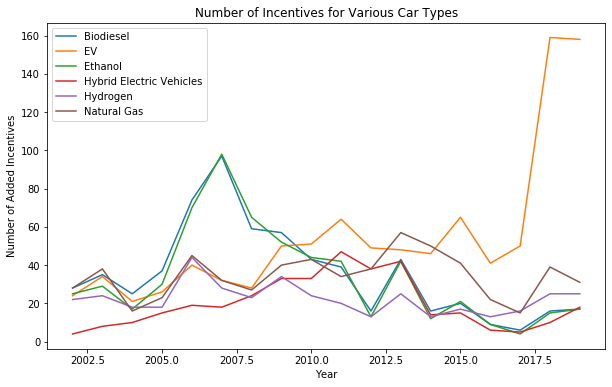

In [58]:
incentives_cleaned.plot.line(figsize=(10, 6))     
plt.xlabel('Year');
plt.ylabel('Number of Added Incentives');
plt.title('Number of Incentives for Various Car Types');
plt.legend();

## Per Capita Energy-Related $CO_2$ Emissions

In [66]:
emissions = pd.read_excel('Per_capita_energy_related_CO2_emissions_by_state_cleaned.xlsx', index_col=0).T.drop(
    columns='District of Columbia')
emissions.index.name = 'Year'
emissions.columns.name = None
emissions_cleaned = emissions
emissions_cleaned.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,
Year,,,,,,,,,,,,,,,,,,,,,
1990,27.163969,62.462566,17.069287,21.602635,11.937291,19.957713,12.367187,24.878165,14.449857,21.372888,...,21.337871,35.564166,31.303018,9.677523,15.267816,13.474130,57.641551,17.465990,125.271237,NaN
1991,27.905854,61.684212,16.836064,20.916784,11.332304,19.866917,12.077842,25.567995,14.175312,19.731336,...,20.112930,34.663681,29.816797,9.931125,15.267227,13.334397,53.191226,17.725318,120.238511,NaN
1992,29.137263,62.101415,17.009799,21.294309,11.282924,19.528150,12.172070,23.442902,14.053610,19.168422,...,20.846082,34.273388,29.743497,10.659599,15.174908,14.227216,53.866842,17.328474,130.660185,NaN
1993,29.811958,60.821363,16.936393,20.569804,10.835843,19.916725,11.540289,25.114048,13.996469,20.053341,...,22.596705,34.371175,29.719519,10.672641,15.609732,13.354709,54.106465,17.743798,122.459052,NaN
1994,29.004691,60.131829,16.857443,21.814415,11.272548,19.438654,11.297025,23.741799,14.204439,19.950214,...,21.158519,33.875323,29.310723,10.260916,15.239510,13.901516,58.176124,18.187295,125.226828,NaN


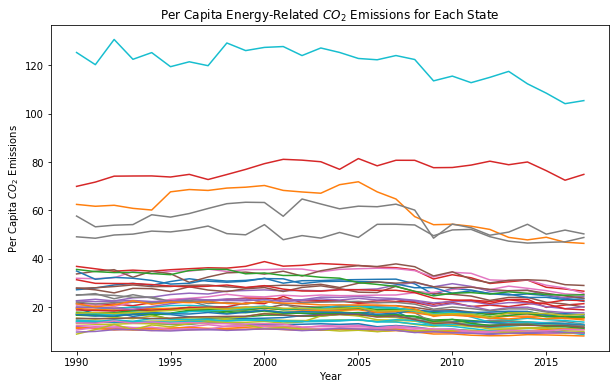

In [73]:
emissions_cleaned.plot.line(figsize=(10, 6), legend=False)     
plt.xlabel('Year');
plt.ylabel('Per Capita $CO_2$ Emissions');
plt.title('Per Capita Energy-Related $CO_2$ Emissions for Each State');